In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Python_Videos/LinearReg_Insurance_Charges/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape
# rows=1338,col=7

(1338, 7)

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#### Value Counts for categorical columns

In [ ]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

#### EDA

#### Gender wise Mean of Charges

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
r1 = df.groupby(['sex'])['charges'].mean()
r1

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

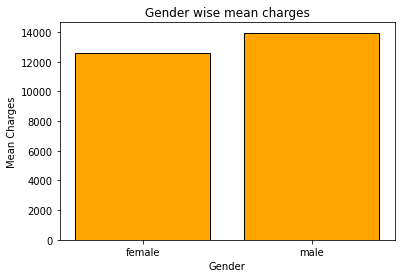

In [ ]:
plt.bar(r1.index,r1,color='orange',edgecolor='black')
plt.title('Gender wise mean charges')
plt.xlabel('Gender')
plt.ylabel('Mean Charges')
plt.show()

#### Smoker wise Mean of Charges

In [ ]:
r2 = df.groupby(['smoker'])['charges'].mean()
r2

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

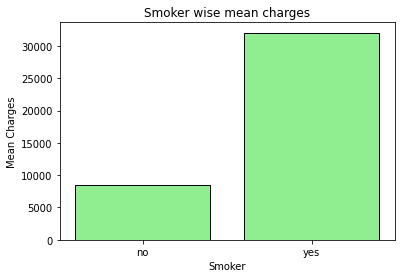

In [ ]:
plt.bar(r2.index,r2,color='lightgreen',edgecolor='black')
plt.title('Smoker wise mean charges')
plt.xlabel('Smoker')
plt.ylabel('Mean Charges')
plt.show()

#### Region wise mean of charges

In [ ]:
r3 = df.groupby(['region'])['charges'].mean()
r3

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

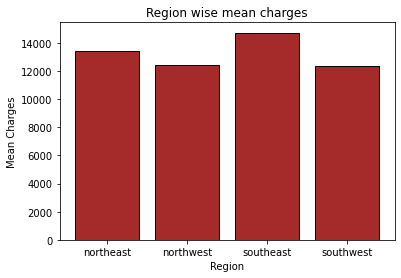

In [ ]:
plt.bar(r3.index,r3,color='brown',edgecolor='black')
plt.title('Region wise mean charges')
plt.xlabel('Region')
plt.ylabel('Mean Charges')
plt.show()

#### Correlation

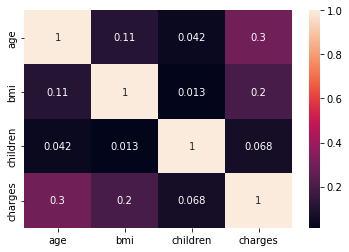

In [ ]:
corr = df.corr()
sns.heatmap(corr,annot=True)
plt.show()

#### Label Encoder

In [ ]:
cat_cols = ['sex','smoker','region']

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [ ]:
df['sex'] = lb.fit_transform(df['sex'])
df['smoker'] = lb.fit_transform(df['smoker'])
df['region'] = lb.fit_transform(df['region'])

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [ ]:
x = df.drop('charges',axis=1)
y = df['charges']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(1338, 6)
(1338,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1003, 6)
(335, 6)
(1003,)
(335,)


In [ ]:
print(type(x_train),type(x_test))
print(type(y_train),type(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [ ]:
x_train.head()

,age,sex,bmi,children,smoker,region
1043,28,0,25.800,0,0,3
968,21,1,25.745,2,0,0
594,41,1,40.260,0,0,2
1079,63,1,33.660,3,0,2
1051,64,1,26.410,0,0,0


In [ ]:
y_train.head()

1043     3161.45400
968      3279.86855
594      5709.16440
1079    15161.53440
1051    14394.55790
Name: charges, dtype: float64

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [ ]:
def reg_eval_metrics(y, ypred):
    mae = mean_absolute_error(y, ypred)
    mse = mean_squared_error(y, ypred)
    rmse = np.sqrt(mean_squared_error(y, ypred))
    r2 = r2_score(y, ypred)
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Score:", r2)

def train_test_scr(model):
    print('Training Score',model.score(x_train,y_train))
    print('Testing Score',model.score(x_test,y_test))

### LinearReg

In [ ]:
m1 = LinearRegression()
m1.fit(x_train, y_train)
ypred_m1 = m1.predict(x_test)

In [ ]:
train_test_scr(m1)

Training Score 0.7551158429564245
Testing Score 0.7338069544102044


In [ ]:
reg_eval_metrics(y_test, ypred_m1)

MAE: 4019.6367067852752
MSE: 35807072.80613922
RMSE: 5983.901136059922
R2 Score: 0.7338069544102044


In [ ]:
m = m1.coef_
c = m1.intercept_
print(m)
print(c)

[  252.07830816  -270.1850953    316.55473012   364.49255776
 24069.87438208  -259.23126409]
-11074.74865855589


#### Equation of Lienar Regression

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df['Charges_pred'] = m1.predict(x)
df.head()

,age,sex,bmi,children,smoker,region,charges,Charges_pred
0,19,0,27.900,0,1,3,16884.92400,25838.796756
1,18,1,33.770,1,0,2,1725.55230,3728.559059
2,28,1,33.000,3,0,2,4449.46200,6734.580113
3,33,1,22.705,0,0,1,21984.47061,3901.794299
4,32,1,28.880,0,0,1,3866.85520,5604.441449


In [ ]:
df['Charges_pred_eqn'] = m[0]*df['age'] + m[1]*df['sex'] + m[2]*df['bmi'] + m[3]*df['children'] + \
                m[4]*df['smoker'] + m[5]*df['region'] + c

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,Charges_pred,Charges_pred_eqn
0,19,0,27.900,0,1,3,16884.92400,25838.796756,25838.796756
1,18,1,33.770,1,0,2,1725.55230,3728.559059,3728.559059
2,28,1,33.000,3,0,2,4449.46200,6734.580113,6734.580113
3,33,1,22.705,0,0,1,21984.47061,3901.794299,3901.794299
4,32,1,28.880,0,0,1,3866.85520,5604.441449,5604.441449


### Cross Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
kf = KFold(n_splits=10)
m = LinearRegression()
scores = cross_val_score(m,x,y,cv=kf,scoring='r2')
print(scores)
print(scores.mean())

[0.78522549 0.73213924 0.73490618 0.67241306 0.7716613  0.78358383
 0.79318159 0.67054582 0.74216232 0.76222839]
0.7448047213193172
